In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Analyse the trend of average bill payers w.r.t increasing size.

In [3]:
df1.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

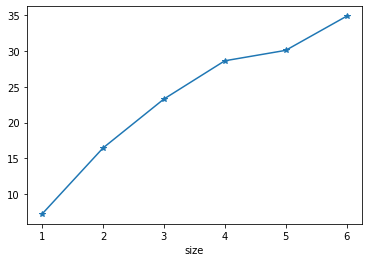

In [6]:
df1.groupby('size')['total_bill'].mean().plot(marker='*')
plt.show()

In [7]:
positive = np.random.randint(5000,10000,12)
deaths = np.random.randint(3000,7000,12)
months = np.arange(1,13)

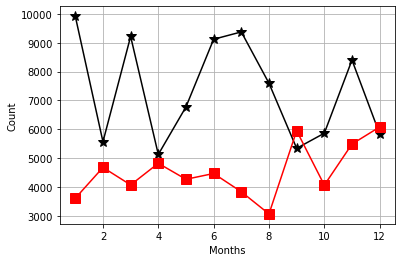

In [10]:
plt.plot(months,positive,label='Positive',marker='*',markersize=10,color='black')
plt.plot(months,deaths,label='deaths',marker='s',markersize=10,color='red')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

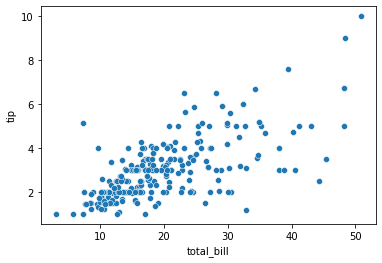

In [11]:
sns.scatterplot(data=df1,x='total_bill',y='tip')
plt.show()

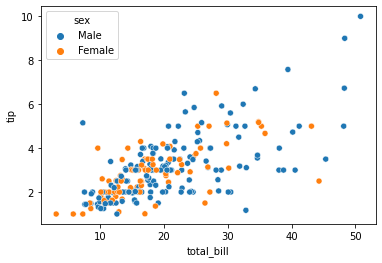

In [12]:
sns.scatterplot(data=df1,x='total_bill',y='tip',hue='sex')
plt.show()

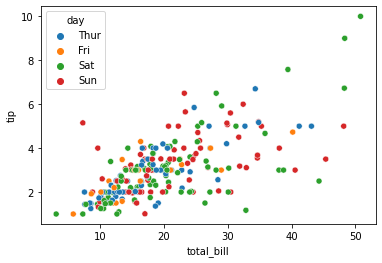

In [13]:
sns.scatterplot(data=df1,x='total_bill',y='tip',hue='day')
plt.show()

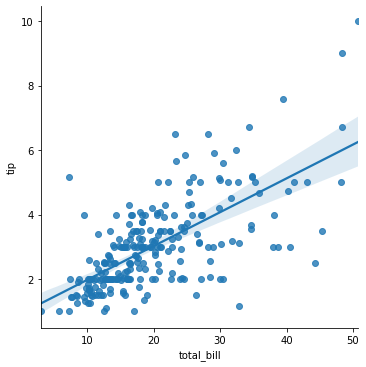

In [14]:
sns.lmplot(data=df1,x='total_bill',y='tip')
plt.show()

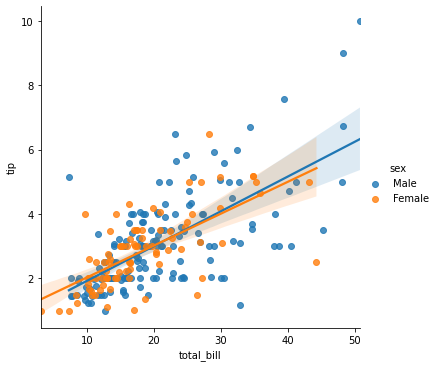

In [15]:
sns.lmplot(data=df1,x='total_bill',y='tip',hue='sex')
plt.show()

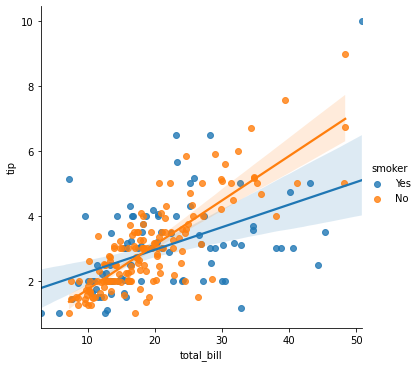

In [16]:
sns.lmplot(data=df1,x='total_bill',y='tip',hue='smoker')
plt.show()

# Heatmap for Correlation 

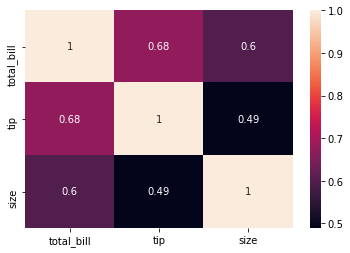

In [18]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Pairplot

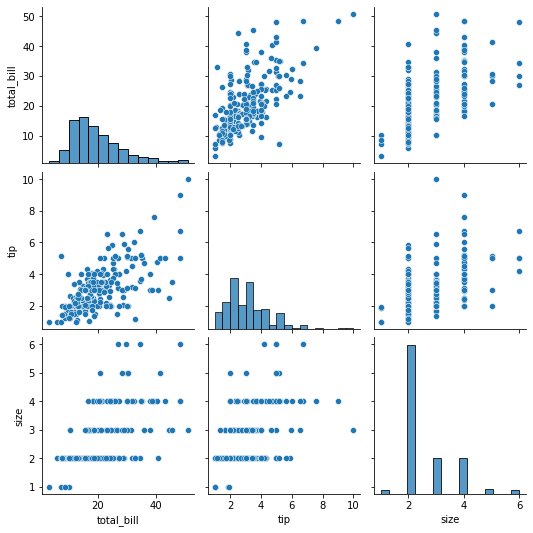

In [19]:
sns.pairplot(df1)
plt.show()

# Numerical and Categorical - Bivariate & Multivariate Graphs

### Q1. Compare maximum total bill's paid on different days.

In [20]:
df1.groupby('day')['total_bill'].max()

day
Thur    43.11
Fri     40.17
Sat     50.81
Sun     48.17
Name: total_bill, dtype: float64

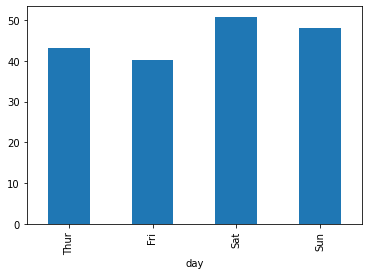

In [21]:
df1.groupby('day')['total_bill'].max().plot(kind='bar')
plt.show()

## Q2. Are there any outliers in Day w.r.t Total Bill

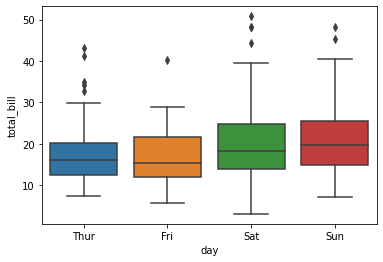

In [22]:
sns.boxplot(data=df1,x='day',y='total_bill')
plt.show()

## Q3. How is the total bill column distributed w.r.t days.

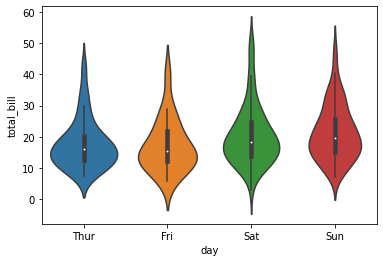

In [23]:
sns.violinplot(data=df1,x='day',y='total_bill')
plt.show()

# Which day has an entry of around 20$ bill paid.? ( Use Graph only )

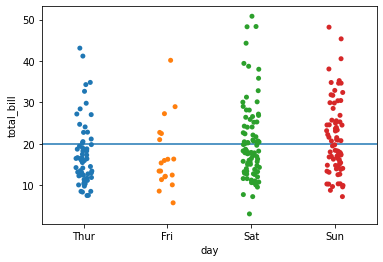

In [4]:
sns.stripplot(data=df1,x='day',y='total_bill')
plt.axhline(20)
plt.show()

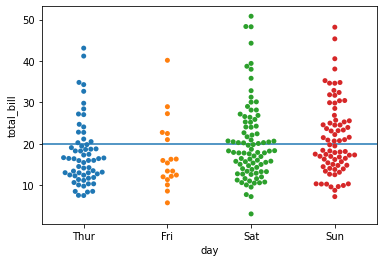

In [5]:
sns.swarmplot(data=df1,x='day',y='total_bill')
plt.axhline(20)
plt.show()

# Categorical to Categorical Graphs

1. Stacked Bar Graph
2. Side by Side Bar Graph

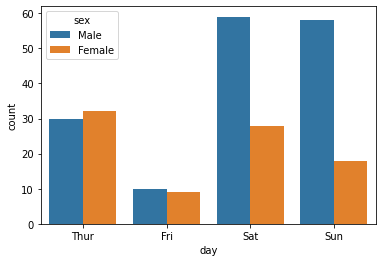

In [6]:
sns.countplot(data=df1,x='day',hue='sex')
plt.show()

In [7]:
pd.crosstab(df1['day'],df1['sex'])

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


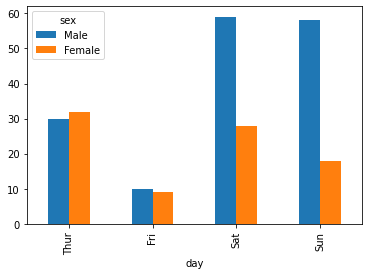

In [8]:
pd.crosstab(df1['day'],df1['sex']).plot(kind='bar')
plt.show()

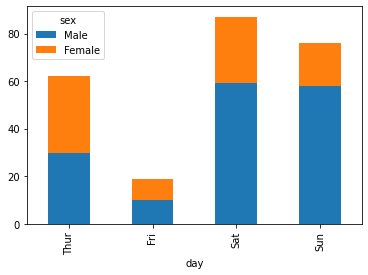

In [9]:
pd.crosstab(df1['day'],df1['sex']).plot(kind='bar',stacked=True)
plt.show()

# Handling Missing Values

In [10]:
a = np.array([1,2,3,np.nan])
b = np.array([10,20,30,40])

In [11]:
a+b

array([11., 22., 33., nan])

In [12]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
data.isnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [16]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
per = data.isnull().sum() / len(data) *100
per[per>0]

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [20]:
del data['deck']

In [21]:
per = data.isnull().sum() / len(data) *100
per[per>0]

age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64

In [22]:
data.dropna(subset=['embarked'],inplace=True) # Drop rows w.r.t embarked.

In [23]:
per = data.isnull().sum() / len(data) *100
per[per>0]

age    19.910011
dtype: float64

In [28]:
data['age'].skew()

0.3888806178753708

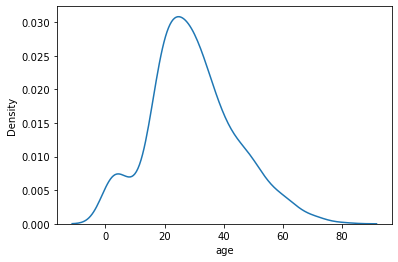

In [30]:
sns.kdeplot(data['age'])
plt.show()

In [31]:
data['age'].mean()

29.64209269662921

In [32]:
data['age'] = data['age'].fillna(data['age'].mean())

In [33]:
per = data.isnull().sum() / len(data) *100
per[per>0]

Series([], dtype: float64)

In [34]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Detecting & Treating Outliers

In [35]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
from scipy.stats import zscore

In [37]:
df1['ZTB'] = zscore(df1['total_bill'])
df1.head()

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [40]:
df1[(df1['ZTB'] < -3) | (df1['ZTB'] > 3)]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [42]:
df2 = df1[~((df1['ZTB'] < -3) | (df1['ZTB'] > 3))]

In [43]:
len(df1)

244

In [44]:
len(df2)

240

In [45]:
print("Skewness of Original Total Bill",df1['total_bill'].skew())
print("Skewness of ZScore cleaned Total Bill",df2['total_bill'].skew())

Skewness of Original Total Bill 1.1332130376158205
Skewness of ZScore cleaned Total Bill 0.9148510261489988


In [46]:
print("Kurtosis of Original Total Bill",df1['total_bill'].kurt())
print("Kurtosis of ZScore cleaned Total Bill",df2['total_bill'].kurt())

Kurtosis of Original Total Bill 1.2184840156638854
Kurtosis of ZScore cleaned Total Bill 0.5355590055930715


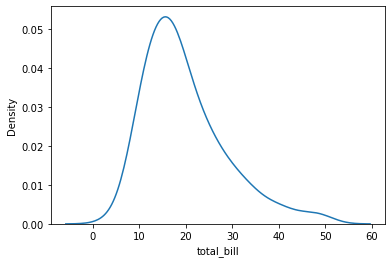

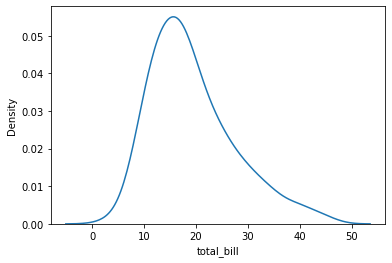

In [47]:
sns.kdeplot(df1['total_bill'])
plt.show()
sns.kdeplot(df2['total_bill'])
plt.show()

# IQR method to treat outliers.

In [49]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [50]:
Q1 = df1['total_bill'].quantile(0.25)
Q2 = df1['total_bill'].quantile(0.5)
Q3 = df1['total_bill'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [51]:
UL

40.29749999999999

In [52]:
LL

-2.8224999999999945

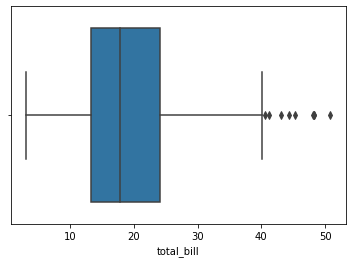

In [53]:
sns.boxplot(data=df1,x='total_bill')
plt.show()

In [54]:
df1[(df1['total_bill']<LL) | (df1['total_bill']>UL)]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.337202
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.625356
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [55]:
len(df1[(df1['total_bill']<LL) | (df1['total_bill']>UL)])

9

In [56]:
df3 = df1[~((df1['total_bill']<LL) | (df1['total_bill']>UL))]

In [57]:
len(df3)

235

In [58]:
print("Skewness of Original Total Bill",df1['total_bill'].skew())
print("Skewness of IQR cleaned Total Bill",df3['total_bill'].skew())

Skewness of Original Total Bill 1.1332130376158205
Skewness of IQR cleaned Total Bill 0.7255976389840281


In [59]:
print("Kurtosis of Original Total Bill",df1['total_bill'].kurt())
print("Kurtosis of IQR cleaned Total Bill",df3['total_bill'].kurt())

Kurtosis of Original Total Bill 1.2184840156638854
Kurtosis of IQR cleaned Total Bill 0.050898514819063934


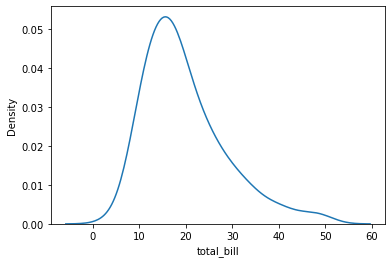

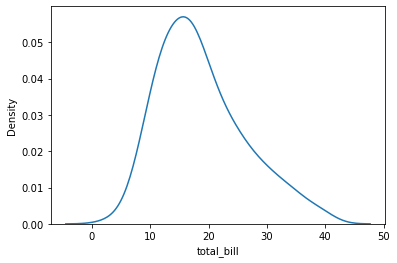

In [60]:
sns.kdeplot(df1['total_bill'])
plt.show()
sns.kdeplot(df3['total_bill'])
plt.show()